Public link to this notebook: https://colab.research.google.com/drive/1SOdNcVb4lfbeJTFfxs4HnFOf2GY_D-l4?usp=sharing .

# New generalization split v\_dat\_p2\_pp\_moved\_to\_recipient predicted to be challenging for Wu et al 2023 baseline Transformers.

split out from https://colab.research.google.com/drive/1rvVNQYH7NUrLmsCfdcyzwMos-HMkCNTM#scrollTo=9qtNY-eruQ5r
so can run in parallel

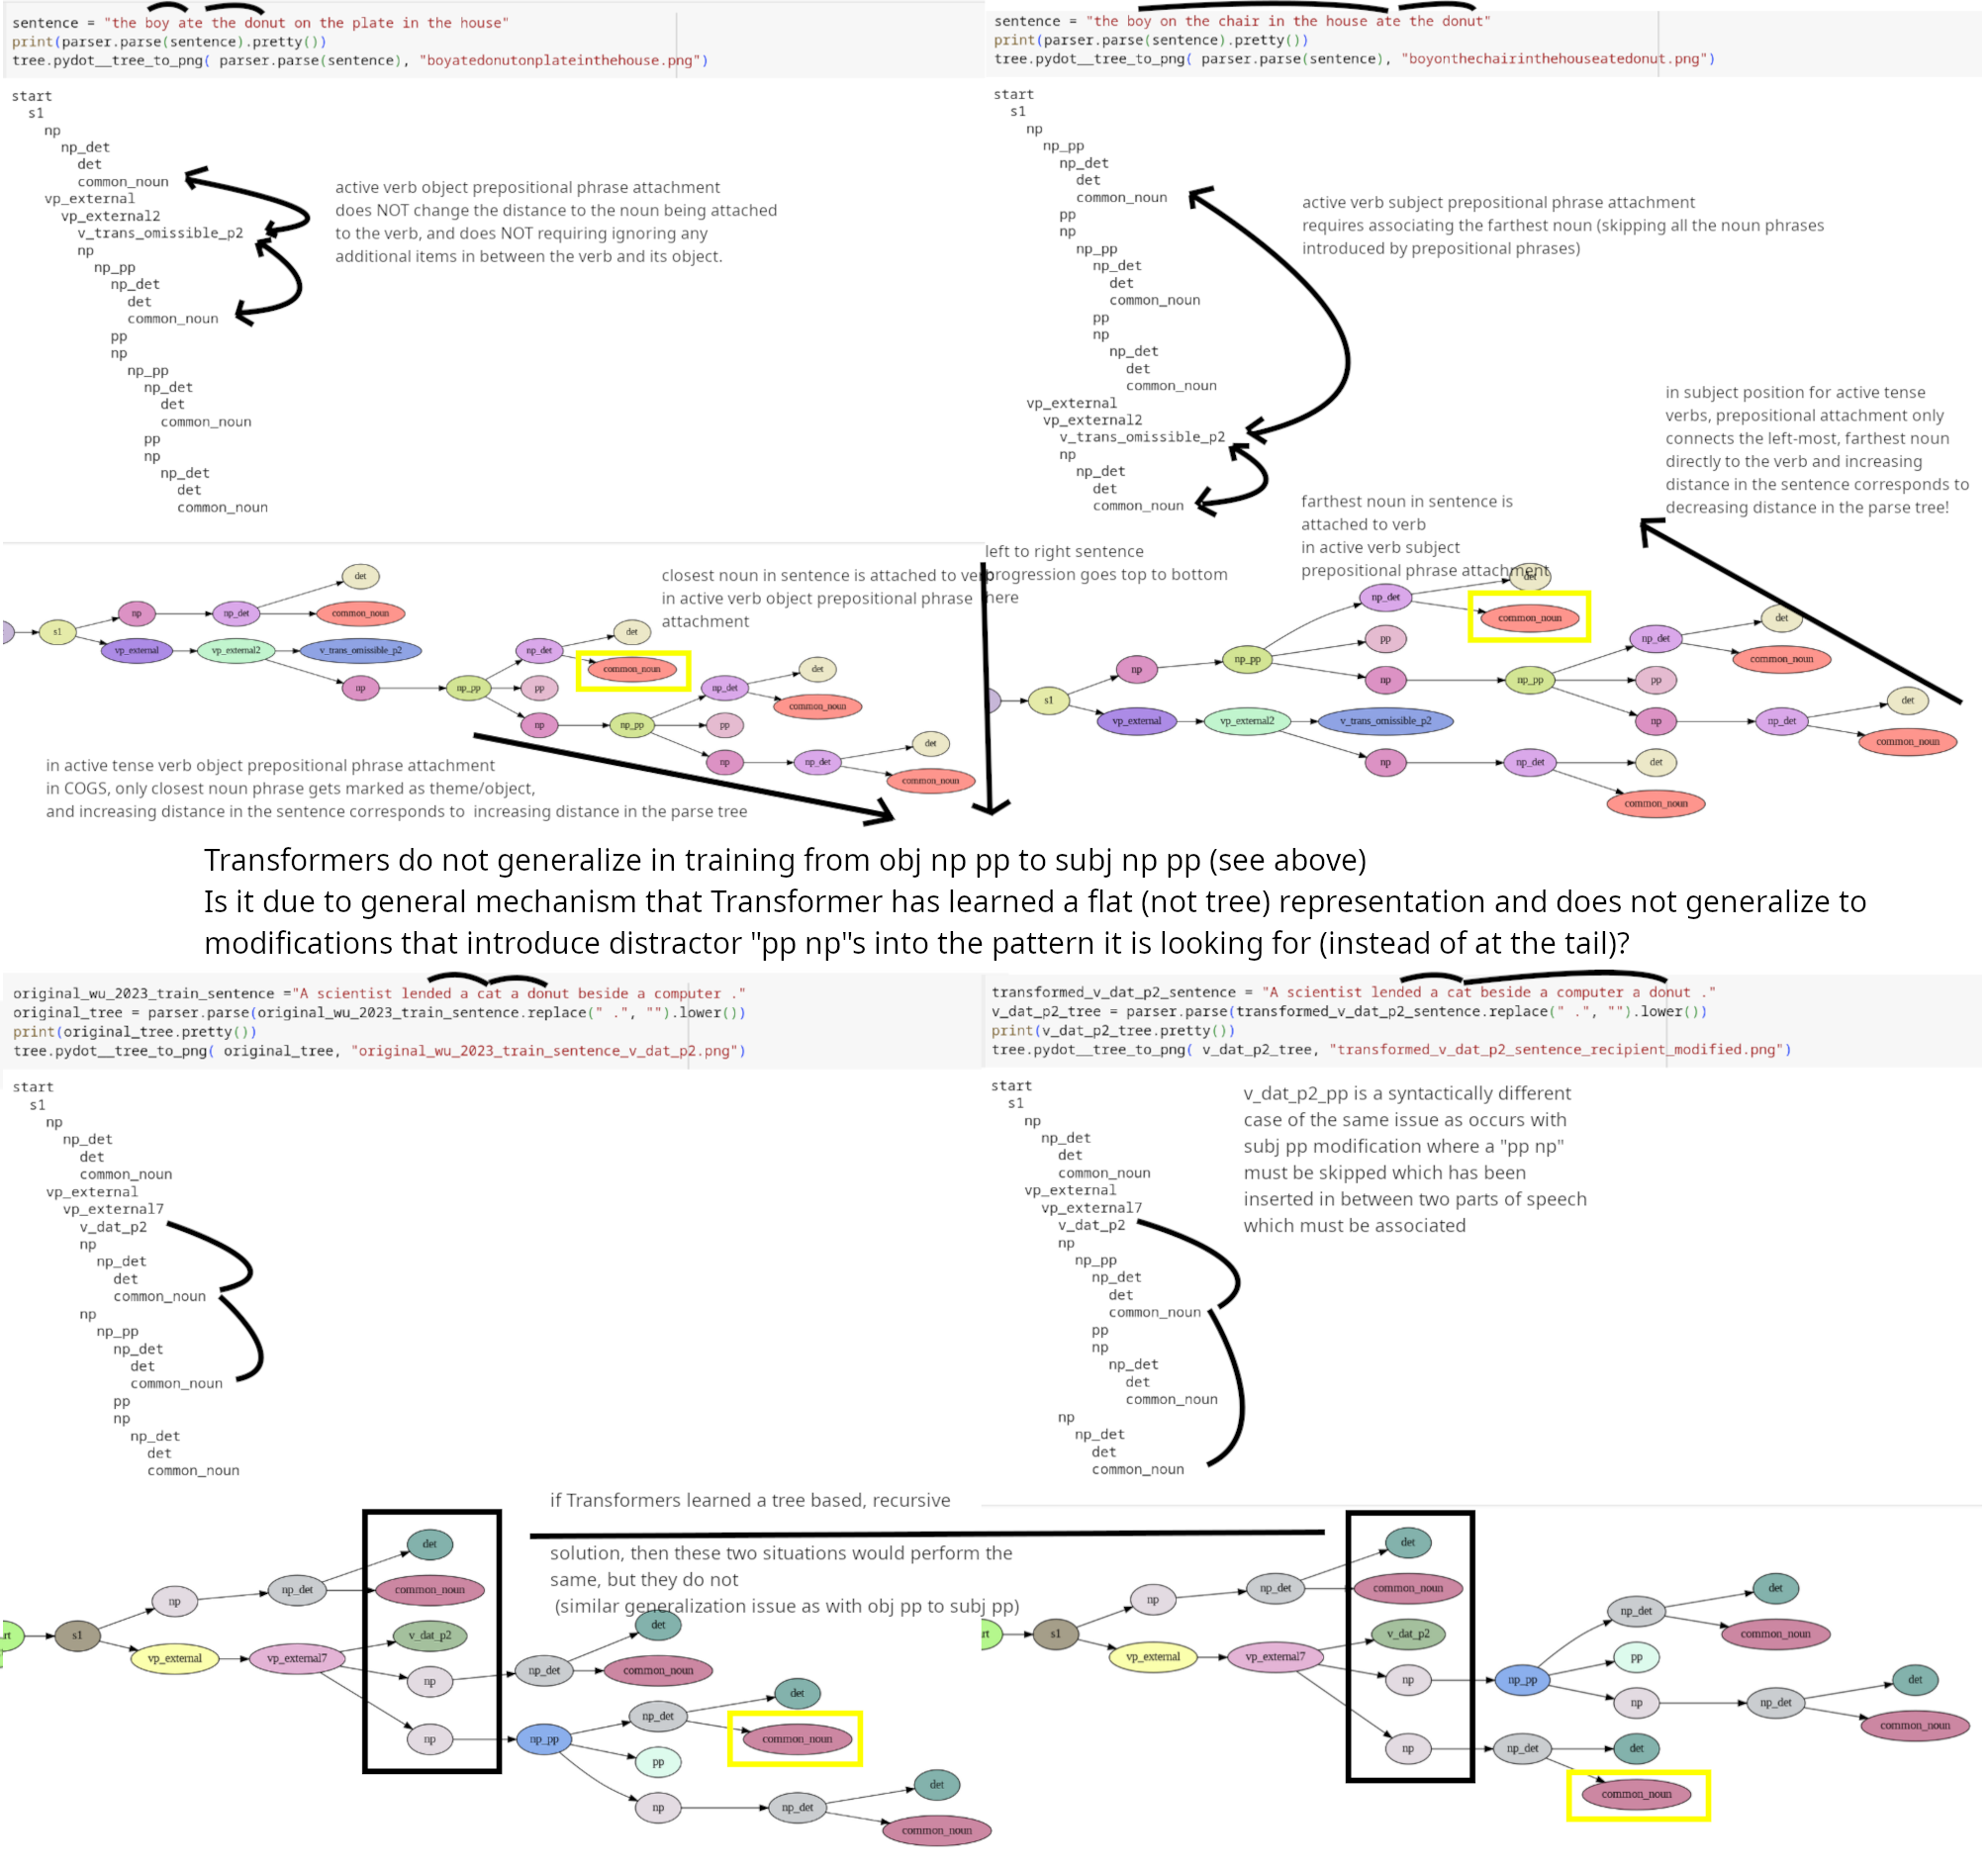

# train ReCOGS baseline Transformer (from Wu et al 2023) on Wu's training set which only has v_dat_p2 pp modification on the theme (right most np), test generalization on recipient modification (left in np pair both right of verb)

we use a large machine here as we are testing the ReCOGS paper author's model (NOT the RASP model) with modified data


should be worse performance on the modified v_dat_p2 split at baseline (this is inverse of experiment above, where we expect an improvement by adding this data to the training set)


need to edit run_cogs.py to make it print out this score:
```
for k, v in per_cat_eval.items():
                if k  == "pp_recursion":
                    struct_pp_acc = 100 * v[0]/v[1]
                elif k  == "cp_recursion":
                    struct_cp_acc = 100 * v[0]/v[1]
                elif k  == "obj_pp_to_subj_pp":
                    struct_obj_subj_acc = 100 * v[0]/v[1]
                elif k  == "subj_to_obj_proper":
                    subj_to_obj_proper_acc = 100 * v[0]/v[1]
                elif k  == "prim_to_obj_proper":
                    prim_to_obj_proper_acc = 100 * v[0]/v[1]
                elif k  == "prim_to_subj_proper":
                    prim_to_subj_proper_acc = 100 * v[0]/v[1]
                elif k == "v_dat_p2_pp_moved_to_recipient":
                  v_dat_p2_pp_moved_to_recipient_acc = 100 * v[0]/v[1]
                else:
                    lex_acc += v[0]
                    lex_count += v[1]
            lex_acc /= lex_count
            lex_acc *= 100
            current_acc *= 100

            print(f"obj_pp_to_subj_pp: {struct_obj_subj_acc}")
            print(f"cp_recursion: {struct_cp_acc}")
            print(f"pp_recursion: {struct_pp_acc}")
            print(f"subj_to_obj_proper: {subj_to_obj_proper_acc}")
            print(f"prim_to_obj_proper: {prim_to_obj_proper_acc}")
            print(f"prim_to_subj_proper: {prim_to_subj_proper_acc}")
            print(f"v_dat_p2_pp_moved_to_recipient: {v_dat_p2_pp_moved_to_recipient_acc}")
            print(f"LEX: {lex_acc}")
            print(f"OVERALL: {current_acc}")

            results[f"{seed}_{data_variant}_{lf}"] = {
                "obj_pp_to_subj_pp" : struct_obj_subj_acc,
                "cp_recursion" : struct_cp_acc,
                "pp_recursion" : struct_pp_acc,
                "subj_to_obj_proper" : subj_to_obj_proper_acc,
                "prim_to_obj_proper" : prim_to_obj_proper_acc,
                "prim_to_subj_proper" : prim_to_subj_proper_acc,
                "v_dat_p2_pp_moved_to_recipient": v_dat_p2_pp_moved_to_recipient_acc,
                "lex_acc" : lex_acc,
                "overall_acc" : current_acc,
                "test_acc" : test_acc
            }
```

upload modified_train_set_examples_v_dat_p2_pp_moved_to_recipient.tsv from https://colab.research.google.com/drive/1IDs0EwIMp2wtLHk4KqnuGhuT3G14QEG1

In [ ]:
%cd /content/
!rm -rf ReCOGS
!git clone https://github.com/frankaging/ReCOGS.git
%cd ReCOGS
!mkdir cogs_train_default_wu_data_gen_on_modified_v_dat_p2

!cp recogs_positional_index/dev.tsv  cogs_train_default_wu_data_gen_on_modified_v_dat_p2/dev.tsv
!cp recogs_positional_index/train.tsv  cogs_train_default_wu_data_gen_on_modified_v_dat_p2/train.tsv

!cp recogs_positional_index/test.tsv cogs_train_default_wu_data_gen_on_modified_v_dat_p2/test.tsv
!cp recogs_positional_index/gen.tsv cogs_train_default_wu_data_gen_on_modified_v_dat_p2/gen.tsv

# we did the experiment in one direction that adding this to the training data
# now we also see how a fresh model does on this data after training on original training set
# training examples here are from https://colab.research.google.com/drive/1IDs0EwIMp2wtLHk4KqnuGhuT3G14QEG1
# each row is a row from Wu et al 2023's training data with rearrangement, no contamination of elsewhere or changing of vocabulary statistics
!tail +2 /content/modified_train_set_examples_v_dat_p2_pp_moved_to_recipient.tsv | sed -E 's/in_distribution/v_dat_p2_pp_moved_to_recipient/g' >> /content/gen_suffix.tsv
!head /content/gen_suffix.tsv


/content
Cloning into 'ReCOGS'...
remote: Enumerating objects: 436, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 436 (delta 96), reused 92 (delta 73), pack-reused 312 (from 1)
Receiving objects: 100% (436/436), 84.71 MiB | 36.94 MiB/s, done.
Resolving deltas: 100% (303/303), done.
Updating files: 100% (137/137), done.
/content/ReCOGS
Liam gave the monkey in the container a chalk .	Liam ( 0 ) ; * monkey ( 3 ) ; * container ( 6 ) ; chalk ( 8 ) ; give ( 1 ) AND agent ( 1 , 0 ) AND recipient ( 1 , 3 ) AND theme ( 1 , 8 ) AND nmod . in ( 3 , 6 )	v_dat_p2_pp_moved_to_recipient
Emma gave a landlord in a house the box .	Emma ( 0 ) ; landlord ( 3 ) ; house ( 6 ) ; * box ( 8 ) ; give ( 1 ) AND agent ( 1 , 0 ) AND recipient ( 1 , 3 ) AND theme ( 1 , 8 ) AND nmod . in ( 3 , 6 )	v_dat_p2_pp_moved_to_recipient
Emma awarded a bird on the stool the drink .	Emma ( 0 ) ; bird ( 3 ) ; * stool ( 6 ) ; * drink ( 8 ) ; award ( 1 ) AND a

In [ ]:
!cat /content/gen_suffix.tsv >> cogs_train_default_wu_data_gen_on_modified_v_dat_p2/gen.tsv

In [ ]:
!pwd

/content/ReCOGS


In [ ]:
!ls cogs_train_default_wu_data_gen_on_modified_v_dat_p2

dev.tsv  gen.tsv  test.tsv  train.tsv


We just want to see how the performance is for the v_dat_p2_pp_moved_to_recipient split.
It is expected to be bad (statistically worse than overall accuracy; I may also split out v_dat_p2_theme_modified later), similar to obj_pp_to_subj_pp , since it is out of distribution and similar mechanism.

In [ ]:
# Wu et al 2023 transformer with Wu et al 2023 baseline training data (no changes from me)
# How does it do on `np v_dat_p2 np pp np np` examples when it per the author's train.tsv it trains on `np v_dat_p2 np np pp np` ?
!python run_cogs.py --model_name ende_transformer --use_iiem --gpu 1 --train_batch_size 128 --eval_batch_size 128 --lr 0.0001 --data_path ./cogs_train_default_wu_data_gen_on_modified_v_dat_p2 --output_dir ./results_cogs_train_default_wu_data_gen_on_modified_v_dat_p2 --lfs cogs --do_train --do_test --do_gen --max_seq_len 512 --output_json --epochs 300 --seeds "42;66;77;88;99" # paper's seeds, not sure how they chose them

INFO:root:Baselining the Transformer Encoder-Decoder Model
INFO:root:__Number CUDA Devices: 1
INFO:root:Number of model params: 4344077
INFO:root:OUTPUT DIR: ./results_cogs_train_default_wu_data_gen_on_modified_v_dat_p2/cogs_pipeline.model.ende_transformer.lf.cogs.glove.False.seed.42
Epoch: 0:   0% 0/213 [00:00<?, ?it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
/content/ReCOGS/model/encoder_decoder_hf.py:828: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWa

great this is consistent with the hypothesis that the v_dat_p2 pp on recipient generalization is difficult, similar to the obj_pp_to_subj_pp (if not trained for it)

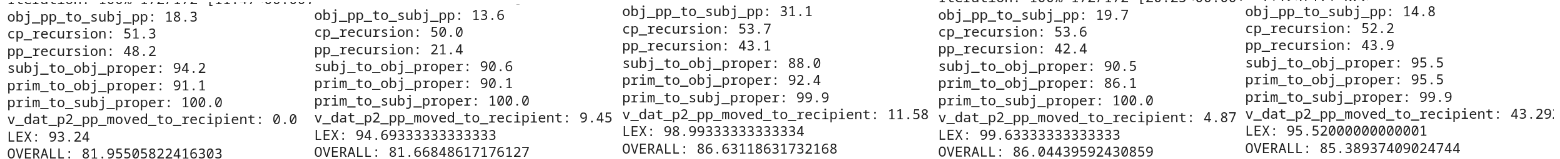

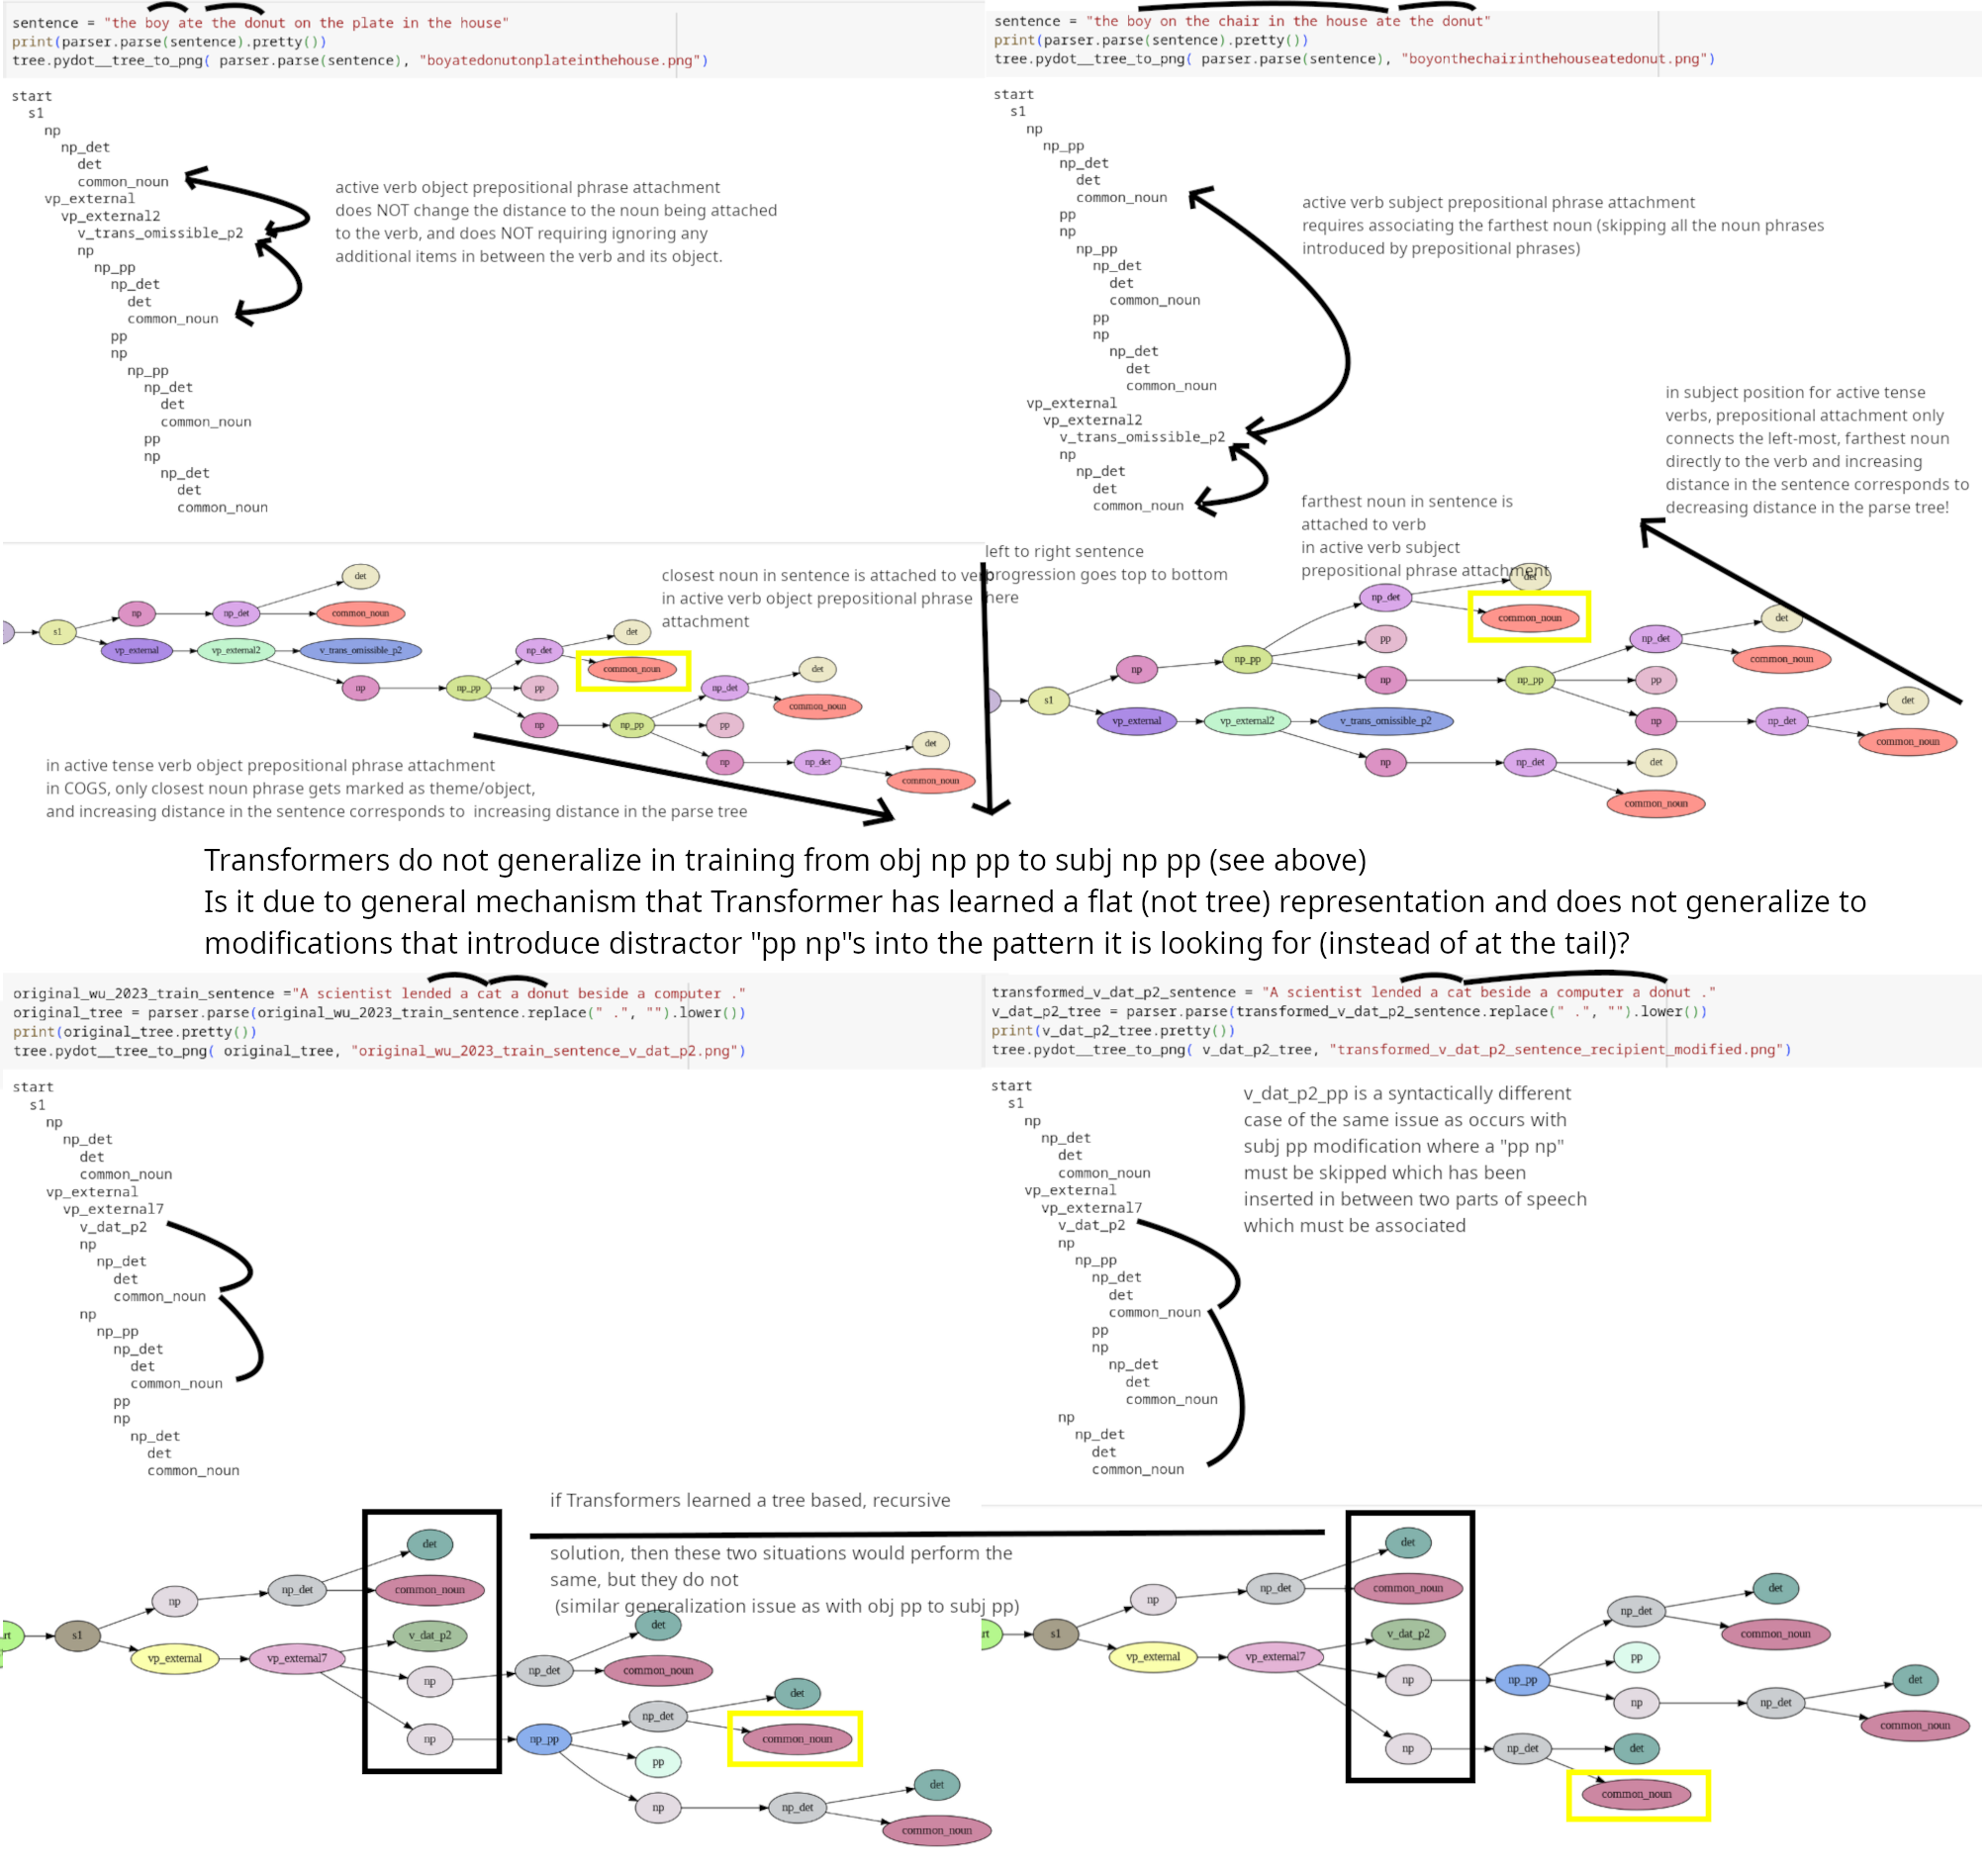

got restarted by colab without custom edit above and without the TSV for 2nd set of 5 seeds, first run had it; now I run it again as I want 10 seeds

In [ ]:
!python run_cogs.py --model_name ende_transformer --use_iiem --gpu 1 --train_batch_size 128 --eval_batch_size 128 --lr 0.0001 --data_path ./cogs_train_default_wu_data_gen_on_modified_v_dat_p2 --output_dir ./results_cogs_train_default_wu_data_gen_on_modified_v_dat_p2 --lfs cogs --do_train --do_test --do_gen --max_seq_len 512 --output_json --epochs 300 --seeds "43;67;78;89;100" # paper's seeds + 1, not sure how they chose them

INFO:root:Baselining the Transformer Encoder-Decoder Model
INFO:root:__Number CUDA Devices: 1
INFO:root:Number of model params: 4344077
INFO:root:OUTPUT DIR: ./results_cogs_train_default_wu_data_gen_on_modified_v_dat_p2/cogs_pipeline.model.ende_transformer.lf.cogs.glove.False.seed.43
Epoch: 0:   0% 0/213 [00:00<?, ?it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
/content/ReCOGS/model/encoder_decoder_hf.py:828: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWa

In [ ]:
import numpy as np
wu_et_al_2023_baseline_v_dat_p2_pp_moved_to_recipient_cogs_pos = np.array([0.0, 9.45,11.58, 4.87, 43.29, 13.109756097560975, 7.621951219512195, 0.6097560975609756, 0.0,43.292682926829265 ])

In [ ]:
wu_et_al_2023_baseline_v_dat_p2_pp_moved_to_recipient_cogs_pos.mean()

13.38241463414634

In [ ]:
wu_et_al_2023_baseline_v_dat_p2_pp_moved_to_recipient_cogs_pos.std()

15.60396657401414

In [ ]:
import math
wu_et_al_2023_baseline_v_dat_p2_pp_moved_to_recipient_cogs_pos.std()/math.sqrt(len(wu_et_al_2023_baseline_v_dat_p2_pp_moved_to_recipient_cogs_pos))

4.934407490701903

In [ ]:
stderr_1p96 = wu_et_al_2023_baseline_v_dat_p2_pp_moved_to_recipient_cogs_pos.std()/math.sqrt(len(wu_et_al_2023_baseline_v_dat_p2_pp_moved_to_recipient_cogs_pos))*1.96

In [ ]:
(wu_et_al_2023_baseline_v_dat_p2_pp_moved_to_recipient_cogs_pos.mean() - stderr_1p96, wu_et_al_2023_baseline_v_dat_p2_pp_moved_to_recipient_cogs_pos.mean() + stderr_1p96)

(3.7109759523706085, 23.05385331592207)